In [37]:
# Imports
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import os

import os

# Set the default folder path
default_folder = 'C:/Users/ashly/OneDrive/Documents/Education Material/FundamentalsDS/Project/DS-Model'

# Change the working directory
os.chdir(default_folder)
print(f'The default directory for this notebook is: {os.getcwd()}')

The default directory for this notebook is: C:\Users\ashly\OneDrive\Documents\Education Material\FundamentalsDS\Project\DS-Model


The Six Figure Salary Predictive Model based on School Choice (Classification)
Target Feature: Six Figure Salary by mid-career (True or False)
Descriptive features: School Name, Stem Percent, Total_Cost of School, Rank of School, Diversity Index 

The steps to preprocess the data for this model are, 
1. **Complete** Filtering the data for null values in any cells and removing the entire row if so in the dataset, 
    diversity_school.csv, salary_potential.csv, and total_cost
2. Replace str cells with int for values Degree Length and replace Null Values in Room and Board with 0 to be used in calculations, then add total_cost column(Tuition_Cost.csv)
3. **Complete** Add Region Column to diversity_school dataset 
4. **Complete** Filter Regions using the states to create concentrated visualizations, remove any Unknown state categories
5. Add Diversity Index Column
6. Once datasets are filtered place each necessary column to be used as features in a separate file modelling_data.csv

Step 1: Filter null values

In [58]:
# Function Definition - Remove Null Values from all datasets
def removeNullValues(directory_path):
    # Get a list of all files in the directory
    files = os.listdir(directory_path) 
    
    for f in files:
        # check if the file is a valid dataset
        if '.csv' not in f:
            continue 
        file_path =  os.path.join(directory_path, f)
        df = pd.read_csv(file_path, sep=',')
        
        print(f'Information about File: {f}')
        # Inspect File
        print(df.head()) # display the first few rows
        print(df.dtypes) # display column names and data types
        # check out basics of your data first
        for (name, series) in df.items():
            print('\n'+'ANALYZED ATTRIBUTE NAME:', name)
        # counting records
            print('--COUNT OF RECORDS:', df[name].size)
        # counting missing values
            print('-- COUNT OF MISSING VALUES:', sum(df[name].isnull().values.ravel()))
            print('-- RATIO OF MISSING VALUES:', (sum(df[name].isnull().values.ravel()) / df[name].size) * 100, '%')
        # counting unique values
            print('-- CARDINALITY=COUNT OF UNIQUE VALUES:', df[name].unique().size)
        
        # finding null values in the DataFrame
        print('The sum of null values are:')
        print(df.isnull().sum())
        
        # Remove Null values
        print('Count of cells BEFORE dropping empty cells:', df.size, '\n')
        df.dropna()
        df.to_csv(file_path, index=False)
        print('Count of cells AFTER dropping empty cells:', df.size, '\n')
        print('------------------------------------------------------------------')

In [59]:
# Function Execution
directory_path =  os.path.join(os.getcwd(), 'data_raw')
if os.path.exists(directory_path):
    removeNullValues(directory_path)
else:
    print(f'Something is wrong with the {directory_path}')

Information about File: diversity_school.csv
                            name  total_enrollment    state  \
0  University of Phoenix-Arizona            195059  Arizona   
1  University of Phoenix-Arizona            195059  Arizona   
2  University of Phoenix-Arizona            195059  Arizona   
3  University of Phoenix-Arizona            195059  Arizona   
4  University of Phoenix-Arizona            195059  Arizona   

                          category  enrollment region  diversity_percent  
0                            Women      134722   west           0.690673  
1  American Indian / Alaska Native         876   west           0.004491  
2                            Asian        1959   west           0.010043  
3                            Black       31455   west           0.161259  
4                         Hispanic       13984   west           0.071691  
name                  object
total_enrollment       int64
state                 object
category              object
enrollment

Step 2: Replace the str cells with int values in Degree Length and replace Null Values in Room and Board with 0, then add total_cost column to tution_cost dataset

In [18]:
def totalCost(file_path):
    df = pd.read_csv(file_path, sep=',')
    df = df.drop(df.index[2631])
    def toInt(text):
        char = text[0]
        return int(char)
    # replacing _ years with int value
    df['degree_length']=df['degree_length'].fillna(0)
    print(df['degree_length'].head())
    df['degree_length'] = df['degree_length'].apply(lambda x: toInt(x))       
    print(df['degree_length'].head())
    # replacing nulls with 0
    df['room_and_board']=df['room_and_board'].fillna(0)
    # counting missing values
    print('-- COUNT OF MISSING VALUES:', sum(df['room_and_board'].isnull().values.ravel()))
            
    df['total_cost'] = df['in_state_total']*df['degree_length']
    print(df['total_cost'].head())
    
    df.to_csv(file_path, index=False)

Step 3: Add Region and Diversity Percent Columns to diversity_school.csv

In [8]:
# Add Regions to Diversity_School dataset
def addRegions(file_path):
    # 4 Major Regions
    # States in the Northeast
    northeast_states = {'Connecticut', 'Delaware', 'Maine', 'Maryland', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'}

    # States in the Midwest
    midwest_states = {'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'}

    # States in the South
    south_states = {'Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia'}

    # States in the West
    west_states = {'Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming'}
    
    df = pd.read_csv(file_path, sep=',')

    
    for index, row in df.iterrows():
        current_region = ''
        if df.at[index,'state'] in northeast_states:
            current_region = 'northeast'
        elif df.at[index,'state'] in midwest_states:
            current_region = 'midwest'
        elif df.at[index,'state'] in south_states:
            current_region = 'south'
        elif df.at[index,'state'] in west_states:
            current_region = 'west'
        else:
            current_region = 'unknown'  
            
        df.at[index, 'region'] = current_region

    df.to_csv(file_path, index=False)
    print('Region is populated')

In [9]:
# Function Execution
file_path = 'data_raw/diversity_school.csv'
addRegions(file_path)

Region is populated


In [17]:
# Now delete all rows with unknown regions
def cleanDiversitySchool(file_path):
    df = pd.read_csv(file_path, sep=',')
    print('Count of cells BEFORE dropping empty cells:', df.size, '\n')
    for index, row in df.iterrows():
        if df.at[index,'region'] == 'unknown':
            df = df.drop(index)
    df.dropna()
    df.to_csv(file_path, index=False)
    print('Count of cells AFTER dropping empty cells:', df.size, '\n')

In [18]:
# Function Execution
file_path = 'data_raw/diversity_school.csv'
cleanDiversitySchool(file_path)

Count of cells BEFORE dropping empty cells: 196357 

Count of cells AFTER dropping empty cells: 196357 



In [24]:
# Next add a Diversity Percent column using each demographic category enrollment / total enrollment
def addDiversityPercent(file_path):
    df = pd.read_csv(file_path, sep=',')
    
    for index, row in df.iterrows():
        diversity_percent = df.at[index, 'enrollment'] / df.at[index, 'total_enrollment']
            
        df.at[index,'diversity_percent'] = diversity_percent
    
    df.to_csv(file_path, index=False)
    print('Diversity Percent has been added')

In [26]:
file_path = 'data_raw/diversity_school.csv'
addDiversityPercent(file_path)

Diversity Percent has been added


Step 4: Filter Regions using the states to create concentrated visualizations, remove any unknown states

In [27]:
# Create Diversity Pie Charts
def CreateDiversityPieChart(file_path):
    
    # Define dictionaries for diversity data in different regions
    northeast_diversity = {'Women': 0, 'American Indian / Alaska Native': 0, 'Asian': 0, 'Black': 0,'Hispanic': 0, 'Native Hawaiian / Pacific Islander': 0, 'White': 0,'Two Or More Races': 0, 'Unknown': 0, 'Non-Resident Foreign': 0,'Total Minority': 0}
    
    midwest_diversity = {'Women': 0, 'American Indian / Alaska Native': 0, 'Asian': 0, 'Black': 0,'Hispanic': 0, 'Native Hawaiian / Pacific Islander': 0, 'White': 0,'Two Or More Races': 0, 'Unknown': 0, 'Non-Resident Foreign': 0,'Total Minority': 0}
    
    west_diversity = {'Women': 0, 'American Indian / Alaska Native': 0, 'Asian': 0, 'Black': 0,'Hispanic': 0, 'Native Hawaiian / Pacific Islander': 0, 'White': 0,'Two Or More Races': 0, 'Unknown': 0, 'Non-Resident Foreign': 0,'Total Minority': 0}
    
    south_diversity = {'Women': 0, 'American Indian / Alaska Native': 0, 'Asian': 0, 'Black': 0, 'Hispanic': 0, 'Native Hawaiian / Pacific Islander': 0, 'White': 0,'Two Or More Races': 0, 'Unknown': 0, 'Non-Resident Foreign': 0,'Total Minority': 0}
    
    num_northeast_schools = 0
    num_midwest_schools = 0
    num_west_schools = 0
    num_south_schools = 0
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path, sep=',')

    # Add diversity percentages and count schools in each region
    for index, row in df.iterrows():
        category = df.at[index, 'category']
        region = df.at[index, 'region']
        
        match region:
            case 'northeast':
                num_northeast_schools += 1
                northeast_diversity[category] += df.at[index, 'diversity_percent']
            case 'midwest':
                num_midwest_schools += 1
                midwest_diversity[category] += df.at[index, 'diversity_percent']
            case 'west':
                num_west_schools += 1
                west_diversity[category] += df.at[index, 'diversity_percent']
            case 'south':
                num_south_schools += 1
                south_diversity[category] += df.at[index, 'diversity_percent']
            case _:
                print(f'Something went wrong at index: {index}')
                
    # Normalize the counts to get percentages
    num_northeast_schools /= 10
    num_midwest_schools /= 10
    num_west_schools /= 10
    num_south_schools /= 10
        
    for key in northeast_diversity.keys():
        northeast_diversity[key] /= num_northeast_schools
        midwest_diversity[key] /= num_midwest_schools
        west_diversity[key] /= num_west_schools
        south_diversity[key] /= num_south_schools

    # Plot pie charts for each region
    def plot_pie_chart(region, title):
        labels = list(region.keys())
        sizes = list(region.values())
        colors = ['#87CEEB', '#FF7F50', '#32CD32', '#DC143C', '#8A2BE2', '#A0522D', '#E6E6FA', '#FFD700', '#BDB76B', '#00008B', '#FFFF00']
        plt.pie(sizes, labels=None, colors=colors, autopct='%1.1f%%', startangle=140, labeldistance=1.1)
        plt.legend(labels, loc='upper right', bbox_to_anchor=(1.15, 1.15))
        plt.axis('equal')
        plt.title(title)
        plt.gcf().set_size_inches(8, 8)
        plt.show()

    plot_pie_chart(northeast_diversity, 'Northeast Diversity Index')
    plot_pie_chart(midwest_diversity, 'Midwest Diversity Index')
    plot_pie_chart(west_diversity, 'West Diversity Index')
    plot_pie_chart(south_diversity, 'South Diversity Index')

    plt.close()


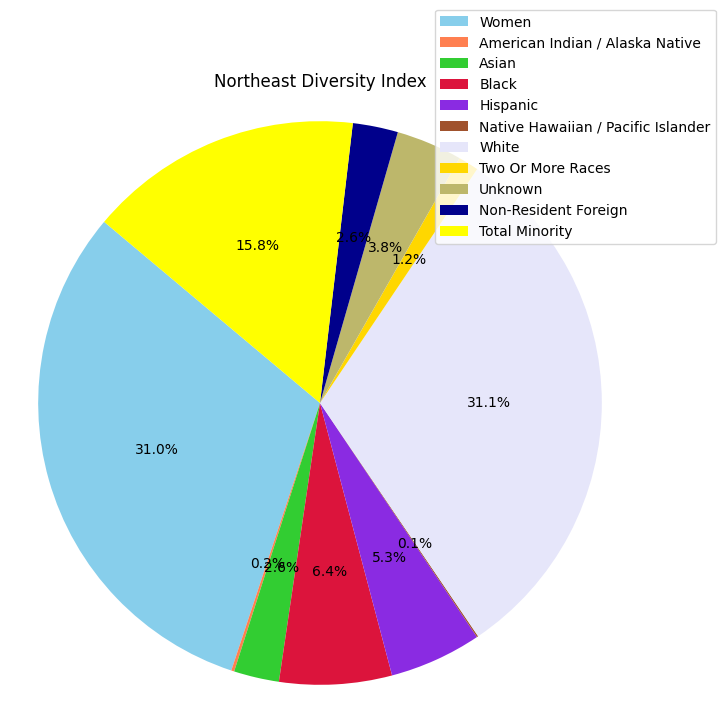

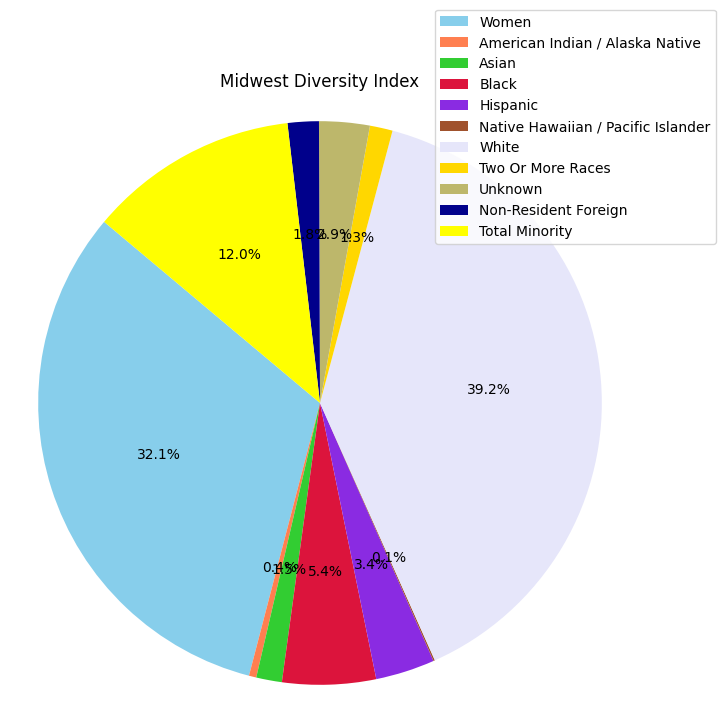

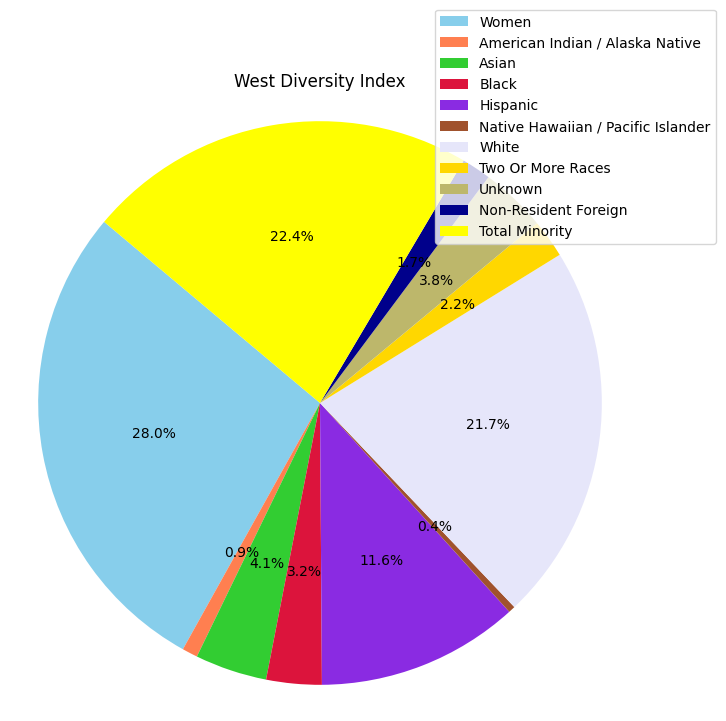

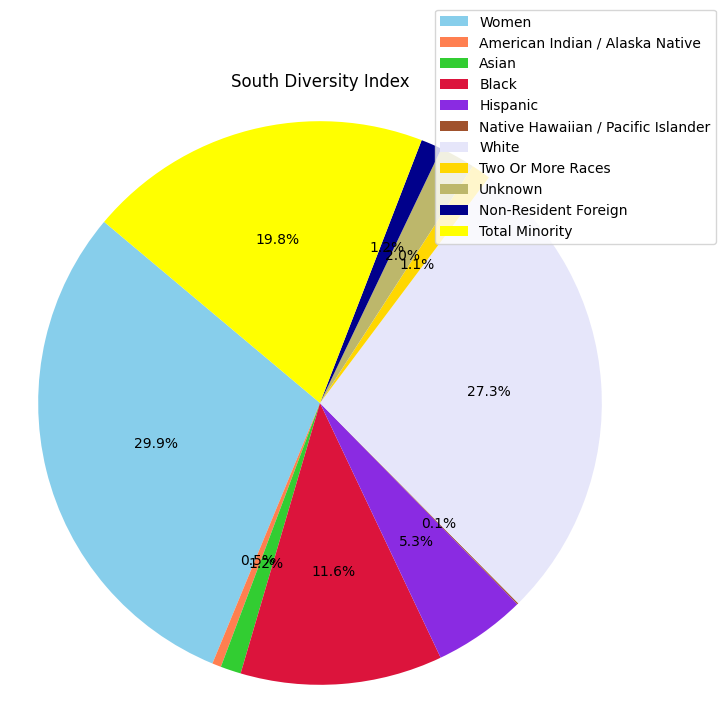

In [28]:
# Function Execution
file_path = 'data_raw/diversity_school.csv'
CreateDiversityPieChart(file_path)

Step 5: Create Diversity Index Column

Step 6: Create modelling_data.csv with all features and target 